In [1]:
import mylibrary as ml
import math
import numpy as np
import matplotlib.pyplot as plt

# Question 1

In [2]:
def func1(x):
    f = math.log(x/2) - math.sin(math.radians((5*x)/2))
    return f

In [3]:
a = 1.5
b = 2.5
nr_guess = 2
precision = 1e-6
#Name: Ratul Das
#Roll number: 1911128
rf_root, rf_list_i, rf_list_f_i, rf_abs_err = ml.regulafalsi(func1, a, b, precision)
nr_root_a, nr_list_i_a, nr_abs_err_a = ml.newtonraphson(func1, a, precision)
nr_root_b, nr_list_i_b, nr_abs_err_b = ml.newtonraphson(func1, b, precision)

print(rf_root)
print(nr_root_a)
print(nr_root_b)

2.201303235202167
2.201303164388981
2.2013031648600205


In [4]:
print("Convergence table for solution obtained using Regula-Falsi method")
ml.showConvergenceTable(rf_list_i, rf_abs_err)

Convergence table for solution obtained using Regula-Falsi method
# of iterations (i)      Absolute Error (|b-a|)

         1               0.7554856700849832
         2               0.04424122158162236
         3               0.008113254412720927
         4               0.0014917491824131268
         5               0.0002744144327664344
         6               5.04843620605655e-05
         7               9.28782306841569e-06
         8               1.708725527738153e-06
         9               3.1436263681072774e-07


In [5]:
print("Convergence table for solution obtained using Newton-Raphson method (initial guess = 1.5)")
ml.showConvergenceTable(nr_list_i_a, nr_abs_err_a)

Convergence table for solution obtained using Newton-Raphson method (initial guess = 1.5)
# of iterations (i)      Absolute Error (|b-a|)

         1               0.569492260777297
         2               0.12731786145128465
         3               0.004507376878472247
         4               1.4364244500963963e-05
         5               2.9526427969273072e-08


In [6]:
print("Convergence table for solution obtained using Newton-Raphson method (initial guess = 2.5)")
ml.showConvergenceTable(nr_list_i_b, nr_abs_err_b)

Convergence table for solution obtained using Newton-Raphson method (initial guess = 2.5)
# of iterations (i)      Absolute Error (|b-a|)

         1               0.3174352123951256
         2               0.01886575559252135
         3               0.00012763708132945695
         4               2.58743954262286e-07


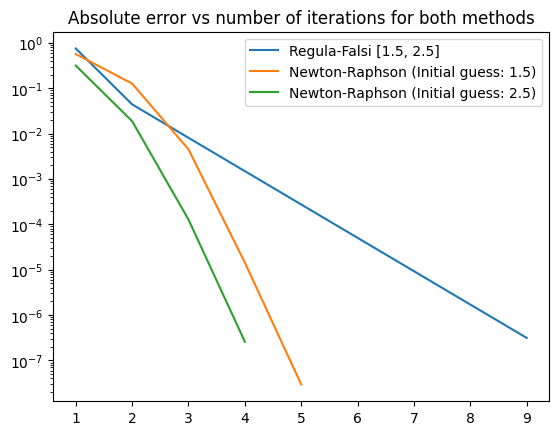

In [7]:
plt.plot(rf_list_i, rf_abs_err, label='Regula-Falsi [1.5, 2.5]')
plt.plot(nr_list_i_a, nr_abs_err_a, label='Newton-Raphson (Initial guess: 1.5)')
plt.plot(nr_list_i_b, nr_abs_err_b, label='Newton-Raphson (Initial guess: 2.5)')
plt.title("Absolute error vs number of iterations for both methods")
plt.yscale("log")
plt.legend()

# Question 2

In [8]:
L_start = 0
L = 10
alpha = 0.01
T0 = 40
T_L = 200
T_a = 20

def d2Tdx2(x, T, flux):
    alpha = 0.01
    T_ambient = 20
    T_diff = T - T_ambient
    return alpha*T_diff

def dTdx(x, T, flux):
    return 0

T_guess_1 = 5
T_guess_2 = 250
stepsize = 0.01
tol = 1e-6

X, T, flux = ml.Shooting(d2Tdx2, dTdx, L_start, T0, L, T_L, T_guess_1, T_guess_2, stepsize, tol)

plt.plot(T,Y)
plt.xlabel(" $v$")
plt.ylabel("Temperature $(in ^\circ)$C")
plt.title("Temperature vs x for the rod")
plt.show()

print(X)
print("At t=0, the velocity of the rocket was", X[0], "m/s")
print("This is very close to the analytical solution, which is 33.1 m/s")

Bracketing was unsuccessful


TypeError: cannot unpack non-iterable NoneType object

# Question 3

In [20]:
#T0 = 0
#T_h = 300

L = 2
J = 100
dx = float(L)/float(J-1)
x_grid = np.array([j*dx for j in range(J)])

T = 10
N = 10000000
dt = float(T)/float(N-1)
t_grid = np.array([n*dt for n in range(N)])

# Question 4

In [11]:
def linear_mass_density(x):
    f = x**2
    return f

def com_numerator(x):
    f = linear_mass_density(x)*x
    return f

# Set intervals, initial number of steps, and tolerance
a = 0
b = 2    # length of rod
N_initial = 2
tol = 1e-5   # the way in which this code is written requires tol to be a set one decimal place more

# Solve for the mass of the rod
mass = ml.simpson_tolerance(a, b, linear_mass_density, tol)

# Solve for the centre of mass
X_com = ml.simpson_tolerance(a, b, com_numerator, tol)/ml.simpson_tolerance(a, b, linear_mass_density, tol)

print(f"Hence, the centre of mass of the rod lies at {X_com:.4f}")

Hence, the centre of mass of the rod lies at 1.5000


# Question 5

In [10]:
A = [[1,-1,4,0,2,9],[0,5,-2,7,8,4],[1,0,5,7,3,-2],[6,-1,2,3,0,8],[-4,2,0,5,-5,3],[0,7,-1,5,4,-2]]
b = [19,2,13,-7,-9,2]

crout_result = ml.solveLU(A,b,1)
print("Obtaining solution of system of linear equations using LU decomposition (via Crout's method):")
#Name: Ratul Das
#Roll number: 1911128
print("a_1 = " + str(crout_result[0]))
print("a_2 = " + str(crout_result[1]))
print("a_3 = " + str(crout_result[2]))
print("a_4 = " + str(crout_result[3]))
print("a_5 = " + str(crout_result[4]))
print("a_6 = " + str(crout_result[5]))

Obtaining solution of system of linear equations using LU decomposition (via Crout's method):
a_1 = -1.7618170439978513
a_2 = 0.8962280338740127
a_3 = 4.0519314041161545
a_4 = -1.6171308025395394
a_5 = 2.0419135385019094
a_6 = 0.1518324871559364


In [11]:
#verifying the solution obtained from LU decomp
b_verify = []
for i in range(len(crout_result)):
    row_sum = 0
    for j in range(len(A[i])):             #fetching row corresponding to each equation
        row_sum += A[i][j]*crout_result[j] #obtaining LHS of each equation from obtained solution
    b_verify.append(row_sum)               #numeric LHS value found using obtained solution
#Name - Ratul Das
#Roll number - 1911128
print("Checking the result obtained:")
print(b_verify) #the result obtained is correct if b matches b_verify

Checking the result obtained:
[19.0, 1.999999999999999, 13.0, -6.99999999999994, -9.000000000000004, 2.000000000000002]
